# Esame Leonardo Oliveri Orioles

### Domenica 30 giugno 2024

In [192]:
#importo tutto e il file csv per lavorare i dati

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv("covid.csv")

In [1]:
# Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [4]:
print ("Le righe del database sono: ", df.shape[0])
print ("Le colonne del database sono: ", df.shape[1])
print("Ecco la lista delle colonne presenti: ", df.columns)
print(df.dtypes) # se vogliono vederne uno specifico ci basta fare df.dtypes["nome"]

Le righe del database sono:  409653
Le colonne del database sono:  67
Ecco la lista delle colonne presenti:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', '

In [29]:
# Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
# Si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente.

In [5]:
df_filtrato = df[df["continent"].notna()]

In [6]:
casi_continenti = df_filtrato.groupby("continent")["total_cases"].sum()

In [7]:
print("Questi sono i continenti e i loro relativi casi riscontrati:")
print(casi_continenti)

Questi sono i continenti e i loro relativi casi riscontrati:
continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64


In [55]:
# Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti,
# ne confronti i seguenti relativi descrittori statistici:valore massimo, media, e percentuale rispetto al numero dei casi totali
# nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [27]:
casi_totali_mondo = df_filtrato["total_cases"].sum()
continenti= ["Europe","Asia"]
risultati={}
for continente in continenti:
    df_continente = df_filtrato[df_filtrato["continent"] == continente]
    casi_max = df_continente["total_cases"].max()
    media_casi = df_continente["total_cases"].mean()
    percentuale_casi = (casi_max / casi_totali_mondo) * 100
    risultati[continente] = {'max': casi_max, 'media': media_casi, 'percentuale': percentuale_casi}
print("Il massimo, la media e la percentuale sono: ",risultati)


Il massimo, la media e la percentuale sono:  {'Europe': {'max': 38997490.0, 'media': 2801516.961143228, 'percentuale': 0.00575413598957876}, 'Asia': {'max': 99361338.0, 'media': 3388162.303456741, 'percentuale': 0.014660908970256794}}


In [127]:
# Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.
# Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
# Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022,
# e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [28]:
df['date'] = pd.to_datetime(df['date'])
df_italy_2022 = df.loc[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy()

Grafico evoluzione dei casi totali in Italia nel 2022


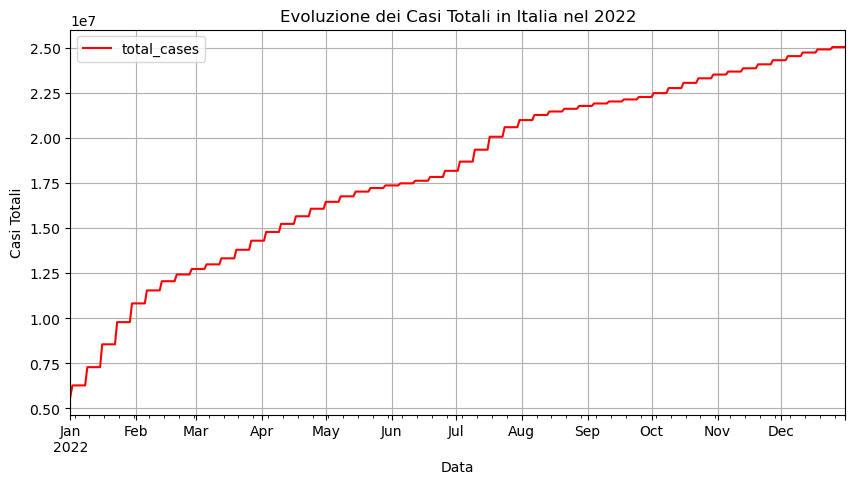

In [29]:
print("Grafico evoluzione dei casi totali in Italia nel 2022")
df_italy_2022.plot(x='date', y='total_cases', kind='line', figsize=(10, 5), color='red', title='Evoluzione dei Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.show()

Grafico evoluzione dei nuovi casi in Italia nel 2022


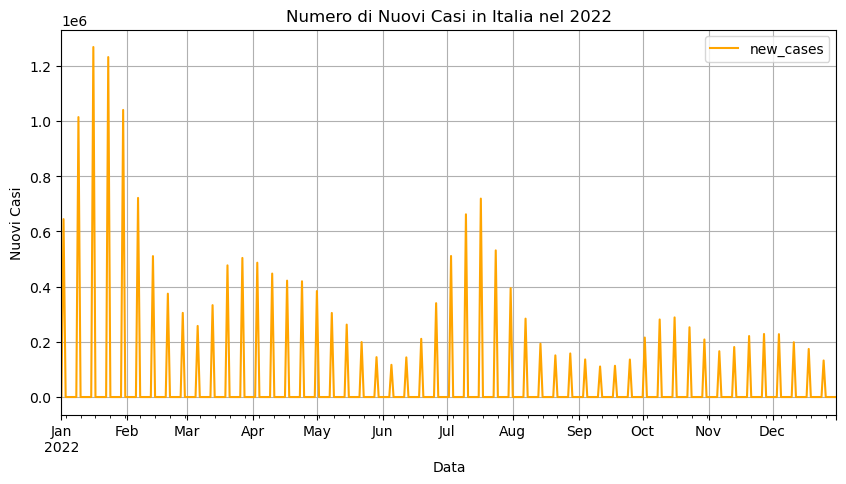

In [206]:
print("Grafico evoluzione dei nuovi casi in Italia nel 2022")
df_italy_2022.plot(x='date', y='new_cases', kind='line', figsize=(10, 5), color='orange', title='Numero di Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.show()

Grafico andamento comulativo dei nuovi casi in italia nel 2022


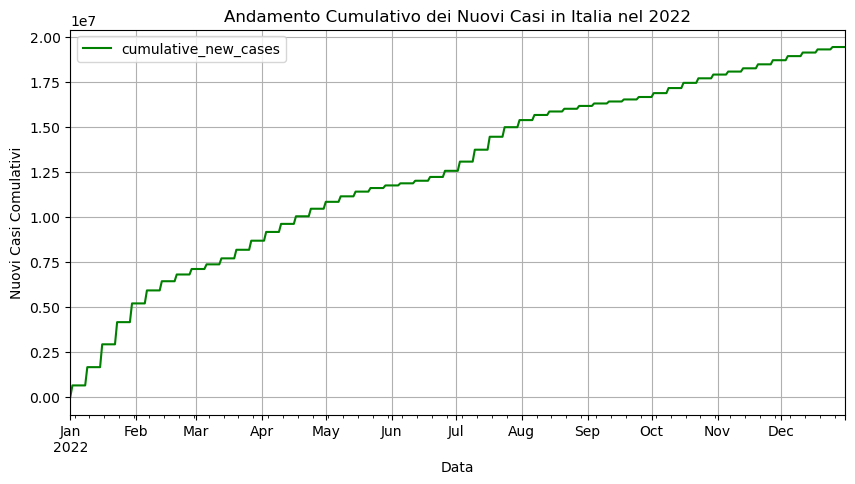

In [209]:
print("Grafico andamento comulativo dei nuovi casi in italia nel 2022")
df_italy_2022.loc[:, 'cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()
df_italy_2022.plot(x='date', y='cumulative_new_cases', kind='line', figsize=(10, 5), color='green', title='Andamento Cumulativo dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi Comulativi')
plt.grid(True)
plt.show()


In [213]:
# Confrontando quest'ultimo grafico con il primo possiamo notare che entrambi tendono a crescere nel tempo.
# Risultano simili in quanto sono strettamente collegati tra di loro e seguono quindi una tendenza simile.
# Differente invece  è il grafico dei nuovi casi, poichè ovviamente segue dei valori che tendono a cambiare nel tempo indistintamente.

In [ ]:
# Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni
# riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso),
# e scrivere un breve commento a riguardo;

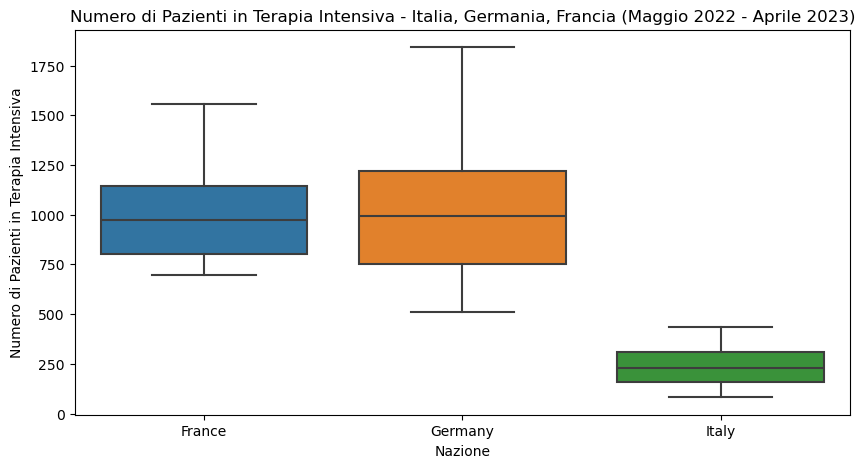

In [38]:
start_date = '2022-05-01'
end_date = '2023-04-30'
df_filtered = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & 
                 (df['date'] >= start_date) & 
                 (df['date'] <= end_date)]

df_filtered = df_filtered[['date', 'location', 'icu_patients']]

plt.figure(figsize=(10, 5))
sb.boxplot(x='location', y='icu_patients', data=df_filtered)
plt.title('Numero di Pazienti in Terapia Intensiva - Italia, Germania, Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva')
plt.show()

In [236]:
# guardando il grafico si può facilmente intuire che l'Italia è il Paese che ha avuto in percentuale il maggio numero di pazienti
# in terapia intensiva a differenza della Germania e della Francia che sono inferiori in questo.

In [237]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna
# se ci sono dati nulli, suggerire se puo essere possibile gestirli tramite sostituzione o meno.

In [52]:
hospitalized_data = df_filtrato[(df_filtrato['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
                               (df_filtrato['date'].str.contains('2023'))]
hospitalized_summary = hospitalized_data.groupby('location')['hosp_patients'].sum()
print(hospitalized_summary)

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
